# Modelos lineales

En primer lugar eliminamos los warnings, y establecemos una semilla para que los resultados sean reproducibles y considerando que el objetivo de estos ejercicios es meramente educativo:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
name = 'Miguel Pérez'
seed = sum(ord(s) for s in name)

## Regresión lineal, método directo (OLS)

### Programación de la solución directa

Partimos del dataset de ejemplo que se utilizó en los apuntes: edad vs salario:

In [3]:
import numpy as np
x = np.array([21, 25, 26, 29, 30, 30, 31, 37, 38, 40, 44, 47, 50, 55, 58, 61])
X = x.reshape((-1, 1))
y = np.array([22000, 30000, 25000, 24000, 28000, 33000, 26000, 35000, 52000, 36000, 55000, 69000, 42000, 80000, 65000, 85000])

Lo primero es pintar los datos para hacernos una idea de si es buena idea intentar aproximarlos con una línea recta:

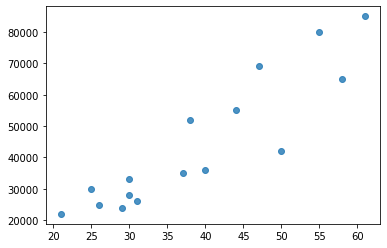

In [4]:
import seaborn as sns
sns.regplot(X, y, fit_reg=False)

En principio parece que sí podría ser factible, ya que se ve una relación (más o menos) lineal entre las dos variables.

Intenta programar el método directo de Ordinary Least Squares. Recuerda que un vector columna de unos se declara así:

In [5]:
ones = np.ones((len(X), 1))

y que se puede pegar los unos como primera columna a X así:

In [6]:
X = np.append(ones, X, axis=1)

Partiendo de aquí, y teniendo presente que el operador multiplicación de matrices es la @, calcula Beta y las predicciones del modelo a partir de las X:

Para el cálculo de Beta debemos resolver la siguiente ecuación matricial:

$$ \beta = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot Y $$

In [7]:
# Se calcula la matriz transpuesta de X
XT = np.matrix.transpose(X)

# Se calcula la multiplicación de X por su transpuesta
XT_X = XT@X

# Se calcula la multiplicación de la transpuesta de X por y
XT_y = XT@y

# Se calcula beta
beta = np.linalg.inv(XT_X)@XT_y

In [8]:
# Se calculan las predicciones
preds = X@beta

Se puede comprobar que el modelo está bien programado viendo si realmente aproxima los datos correctamente:

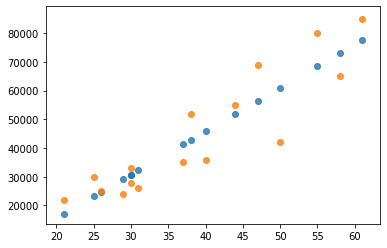

In [9]:
import seaborn as sns
X = x
sns.regplot(X, preds, fit_reg=False)
sns.regplot(X, y, fit_reg=False)

En cuanto al error que comete el modelo en sus predicciones, las métricas más habituales para regresión son el [Mean Squared Error](scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) y el [Mean Absolute Error](scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html): 

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 71814865.44440871 MAE: 7209.405489439264


### Clase LinearRegression de Scikit-learn

La clase correspondiente en Scikit-learn al método que hemos programado es [LinearRegression](scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Podemos comprobar que nuestro modelo es correcto entrenando, haciendo predicciones y viendo si los resultados coinciden:

In [11]:
from sklearn.linear_model import LinearRegression
X = x.reshape((-1, 1))
olsr = LinearRegression()
olsr.fit(X, y)
preds_lr = olsr.predict(X)

Pinta una gráfica con los datos y las predicciones:

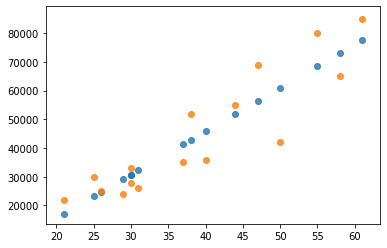

In [12]:
# Con valores de X, preds e y, se puede utilizar el código anterior para pintar los datos y las predicciones
sns.regplot(X, preds_lr, fit_reg=False)
sns.regplot(X, y, fit_reg=False)

Y calcula el MSE y el MAE:

In [13]:
# Con los valores de preds e y, se pueden calcular las métricas igual que anteriormente.
mse = mean_squared_error(y, preds_lr)
mae = mean_absolute_error(y, preds_lr)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 71814865.44440871 MAE: 7209.405489439262


Se puede comprobar que los resultados coinciden.

### Programación de un wrapper compatible con scikit-learn

Intenta programar una clase OLSRegressor para el método directo que sea compatible con Scikit-learn. Para ello, la clase debe heredar de las clases sklearn.base.BaseEstimator y sklearn.base.RegressorMixin.

También debe implementar un método fit(self, X, y) que calcule el beta a partir de X e y y lo guarde en un atributo self.beta_ y un método predict(self, X) que utilice el atributo self.beta_ calculado en fit para realizar predicciones a partir de la X.

In [14]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class OLSRegressor(BaseEstimator, RegressorMixin):

    # No es necesario modificar el __init__ heredado de BaseEstimator ya que no tenemos ningún metaparámetro o estado inicial que añadir

    def fit(self, X, y):
        # Transformar la matriz al formato necesario, es decir, una columna en caso de que no tenga.
        if len(X.shape) == 1: 
            X = x.reshape((-1, 1))
            
        # Añadir la constante
        ones = np.ones((len(X), 1))
        X1 = np.append(ones, X, axis=1)
        
        # Calcular Beta
        XT = np.matrix.transpose(X1)
        XT_X = XT@X1
        XT_y = XT@y
        self.beta_ = np.linalg.inv(XT_X)@XT_y

    def predict(self, X):
        # Transformar la matriz al formato necesario
        if len(X.shape) == 1: 
            X = x.reshape((-1, 1))
        
        # Añadir la constante
        ones = np.ones((len(X), 1))
        X1 = np.append(ones, X, axis=1)
        
        # Calcular las predicciones
        preds = X1@self.beta_
        return preds

Comprueba que funciona:

In [15]:
X = x
olsr = OLSRegressor()
olsr.fit(X, y)
preds_olsr = olsr.predict(X)

Y haz una gráfica con los datos y las predicciones, y calcula el MSE y el MAE:

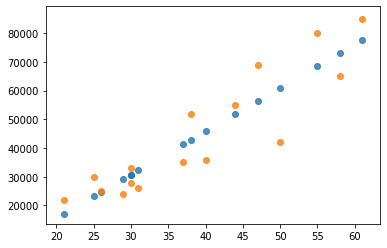

In [16]:
sns.regplot(X, preds_olsr, fit_reg=False)
sns.regplot(X, y, fit_reg=False)

In [17]:
# Con los valores de preds_olsr e y, se pueden calcular las métricas igual que anteriormente.
mse = mean_squared_error(y, preds_olsr)
mae = mean_absolute_error(y, preds_olsr)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 71814865.44440871 MAE: 7209.405489439264


Nuevamente obtenemos el mismo resultado, como era de esperar.

Prueba ahora con el dataset de Boston Housing, que está disponible en Scikit-learn:

In [18]:
from sklearn.datasets import load_boston
X_boston, y_boston = load_boston(return_X_y=True)
olsr_boston = OLSRegressor()
olsr_boston.fit(X_boston, y_boston)
preds_boston = olsr_boston.predict(X_boston)

En este caso hay más de una variable explicativa, así que vamos a hacer la [descomposición PCA](scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) de X para quedarnos sólo con una dimensión y poder pintar una gráfica:

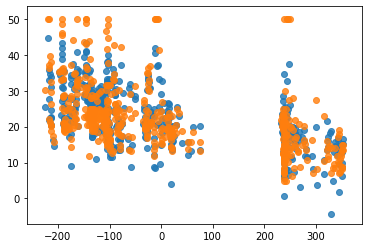

In [19]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA(random_state=seed).fit_transform(X_boston)[:, 0]
sns.regplot(X_pca, preds_boston, fit_reg=False)
sns.regplot(X_pca, y_boston, fit_reg=False)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_boston, preds_boston)
mae = mean_absolute_error(y_boston, preds_boston)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 21.8948311817292 MAE: 3.270862810899728


## Regresión lineal, método iterativo (SGD)

### Clase SGDRegressor

El método directo funciona y en sencillo de programar, pero tiene los problemas que se mencionan en los apuntes:
* las matrices pueden ser singulares y por tanto no tener inversa, lo que invalida el método
* si el conjunto de datos es muy grande, el coste de calcular la matriz inversa es demasiado alto
Por ello vamos a probar el método iterativo de descenso por gradiente (SGD). En Scikit-learn se corresponde con la clase [SGDRegressor](scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html). Carga el dataset de regresión [Boston Housing](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) e intenta entrenar y predecir con el modelo SGDRegressor:

In [21]:
from sklearn.datasets import load_boston
X_boston, y_boston = load_boston(return_X_y=True)

In [22]:
# Se importa el modelo
from sklearn.linear_model import SGDRegressor

# Se carga el modelo, se ajusta a los datos y se predice
model_reg_boston = SGDRegressor()
model_reg_boston.fit(X_boston,y_boston)
preds_reg_boston = model_reg_boston.predict(X_boston)

Como en este dataset hay más de una variable explicativa, vamos a hacer [PCA](scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) de X para quedarnos sólo con una dimensión y poder pintar una gráfica:

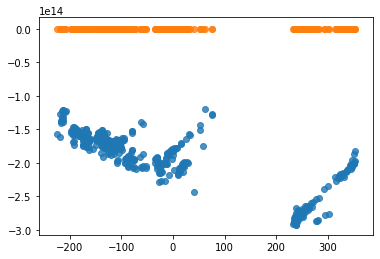

In [23]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA(random_state=seed).fit_transform(X_boston)[:, 0]
sns.regplot(X_pca, preds_reg_boston, fit_reg=False)
sns.regplot(X_pca, y_boston, fit_reg=False)

Las predicciones no parecen nada buenas. Veamos los errores:

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_boston, preds_reg_boston)
mae = mean_absolute_error(y_boston, preds_reg_boston)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 4.1450621443272005e+28 MAE: 198397507953194.0


Esta vez los resultados son muy malos. En los apuntes se indicó que al utilzar un método basado en descenso por gradiente hay que tomar una precaución porque el método tiene mucha sensibilidad a la escala de las variables explicativas. ¿Sabrías explicar de qué precaución se trata?

**Respuesta:** El descenso por gradiente tiene sus inconvenientes. Principalmente, la necesidad de elegir meta-parámetros como la tasa de aprendizaje o su sensibilidad a la escala de las variables. Para evitar problemas con esto último, es habitual estandarizar los datos antes de usarlos para entrenar un modelo mediante descenso por gradiente.

A continuación se resuelve el problema utilizando el preprocesador de datos apropiado:

In [25]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X, y = load_boston(return_X_y=True)
lr = Pipeline([('stds', StandardScaler()), ('sgdr', SGDRegressor())])
lr.fit(X, y)
preds = lr.predict(X)

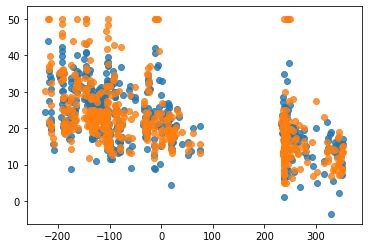

In [26]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA(random_state=seed).fit_transform(X)[:, 0]
sns.regplot(X_pca, preds, fit_reg=False)
sns.regplot(X_pca, y, fit_reg=False)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 22.032490337724244 MAE: 3.282790446237866


Y se puede comprobar que los resultados son correctos.

## Regresión logística

### Clase SGDClassifier

Al igual que para regresión tenemos la clase SGDRegressor, para clasificación tenemos la clase [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html). Prueba a cargar los datos del dataset [Iris](scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) para clasificación (también disponibles en sklearn.datasets) y a entrenar y predecir con un modelo SGDClassifier:

In [28]:
from sklearn.datasets import load_iris
X_iris, y_iris = load_iris(return_X_y=True)

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

iris_classifier = Pipeline([('stds', StandardScaler()), ('sgdc', SGDClassifier())])
iris_classifier.fit(X_iris, y_iris)
preds_iris = iris_classifier.predict(X_iris)

Haz una gráfica con la primera dimensión de PCA, los targets y las predicciones del modelo, como en los ejercicios anteriores:

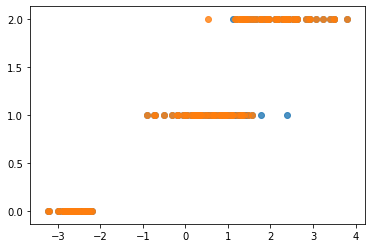

In [30]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca_iris = PCA(random_state=seed).fit_transform(X_iris)[:, 0]
sns.regplot(X_pca_iris, preds_iris, fit_reg=False)
sns.regplot(X_pca_iris, y_iris, fit_reg=False)

Y utiliza la métrica accuracy_score de sklearn.metrics para ver si el resultado es bueno:

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_iris, preds_iris))

0.9333333333333333


Parece un resultado bueno, pero mejorable.

### Clase LogisticRegression

Scikit-learn también proporciona la clase [LogisticRegression](scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) que cuenta con métodos de entrenamiento más avanzados, regularizadores, etc. Repite el proceso con esta nueva clase:

In [32]:
from sklearn.linear_model import LogisticRegression
lr_iris = LogisticRegression(random_state = seed).fit(X_iris, y_iris)
preds_lr_iris = lr_iris.predict(X_iris)

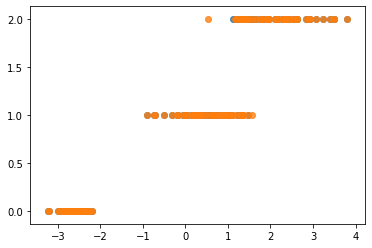

In [33]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca_iris = PCA(random_state=seed).fit_transform(X_iris)[:, 0]
sns.regplot(X_pca_iris, preds_lr_iris, fit_reg=False)
sns.regplot(X_pca_iris, y_iris, fit_reg=False)

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_iris, preds_lr_iris))

0.9733333333333334


## Evaluación correcta del modelo

### Particiones de train y test

En los ejercicios previos hemos cometido un error metodológico importante a la hora de evaluar la calidad de los modelos: hemos calculado las métricas de error con el mismo dataset que hemos usado para entrenar. Esto puede hacer que los modelos caigan en sobreajuste y la estimación del error sea totalmente irreal. Para evitarlo, lo habitual es hacer una partición del dataset en train y test, o realizar una validación cruzada.

Scikit-learn ofrece una forma sencilla de separar train y test con la función [train_test_split](scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Entrena el modelo SGDRegressor sobre Boston Housing usando una partición de train y luego calcula MSE y MAE de sus predicciones sobre test:

In [35]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_boston, y_boston = load_boston(return_X_y=True)
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.3, random_state=seed)

lr = Pipeline([('stds', StandardScaler()), ('sgdr', SGDRegressor())])
lr.fit(X_train_boston, y_train_boston)
preds_boston_test = lr.predict(X_test_boston)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test_boston, preds_boston_test)
mae = mean_absolute_error(y_test_boston, preds_boston_test)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 22.754969358295607 MAE: 3.2864720393932485


Vemos que los valores de MSE y de MAE no difieren mucho de los obtenidos sin haber dividido el set de datos en entrenamiento y test, y se considera que los resultados son positivos.